In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
# Reading the Data file
df = pd.read_csv('Salaries.csv')
df.head()

C:\Users\dubey\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148648 entries, 0 to 148647
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148648 non-null  int64  
 1   EmployeeName      148648 non-null  object 
 2   JobTitle          148648 non-null  object 
 3   BasePay           148043 non-null  float64
 4   OvertimePay       148648 non-null  float64
 5   OtherPay          148648 non-null  float64
 6   Benefits          112490 non-null  float64
 7   TotalPay          148648 non-null  float64
 8   TotalPayBenefits  148648 non-null  float64
 9   Year              148648 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148648 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 14.7+ MB


In [4]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36158
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148648
Agency                   0
Status              110529
dtype: int64

### 1. Compute how much total salary cost has increased from year 2011 to 2014

In [5]:
data = df.loc[:, ['Year','TotalPay']]
data

,Year,TotalPay
0,2011,567595.43
1,2011,538909.28
2,2011,335279.91
3,2011,332343.61
4,2011,326373.19
...,...,...
148643,2014,0.00
148644,2014,0.00
148645,2014,0.00
148646,2014,0.00


In [6]:
data1 = data.groupby('Year').mean()
print(data1)
X = data1.index
Y = data1.values

          TotalPay
Year              
2011  71743.819645
2012  74112.234931
2013  77611.443142
2014  75471.836912


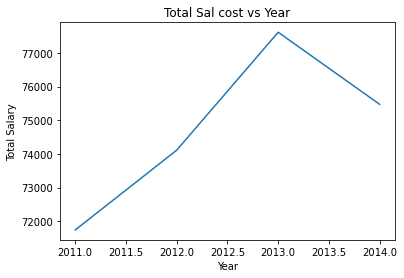

In [7]:
plt.plot(X,Y)
plt.title('Total Sal cost vs Year')
plt.xlabel('Year')
plt.ylabel('Total Salary')
plt.show()

### 2. Which Job Title in Year 2014 has highest mean salary?

In [8]:
data2 = df.loc[:, ['JobTitle','Year','TotalPay']]
data2

,JobTitle,Year,TotalPay
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,2011,567595.43
1,CAPTAIN III (POLICE DEPARTMENT),2011,538909.28
2,CAPTAIN III (POLICE DEPARTMENT),2011,335279.91
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,2011,332343.61
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",2011,326373.19
...,...,...,...
148643,Human Services Technician,2014,0.00
148644,Communications Dispatcher 2,2014,0.00
148645,Custodian,2014,0.00
148646,Custodian,2014,0.00


In [9]:
df2 = data2[data2['Year'] == 2014]
df2

,JobTitle,Year,TotalPay
110529,Deputy Chief 3,2014,471952.64
110530,Asst Med Examiner,2014,390111.98
110531,Chief Investment Officer,2014,339653.70
110532,Chief of Police,2014,326716.76
110533,"Chief, Fire Department",2014,326233.44
...,...,...,...
148643,Human Services Technician,2014,0.00
148644,Communications Dispatcher 2,2014,0.00
148645,Custodian,2014,0.00
148646,Custodian,2014,0.00


In [10]:
print(df2['JobTitle'].value_counts())

Transit Operator                  2479
Special Nurse                     1478
Registered Nurse                  1234
Public Svc Aide-Public Works       916
Firefighter                        815
                                  ... 
Light Rail Vehicle Equip Eng         1
Metalsmith                           1
Wharfinger 1                         1
Board Scty, MTA                      1
Airport Communications Officer       1
Name: JobTitle, Length: 996, dtype: int64


In [11]:
df2[df2['TotalPay']==df2['TotalPay'].max()]

,JobTitle,Year,TotalPay
110529,Deputy Chief 3,2014,471952.64


#### Deputy Cheif 3 Job Title in Year 2014 has highest mean salary

### 3. How much money could have been saved in Year 2014 by stopping OverTimePay?

In [12]:
df3 = df[df['Year'] == 2014]
df3.head(10)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
110529,110532,David Shinn,Deputy Chief 3,129150.01,0.00,342802.63,38780.04,471952.64,510732.68,2014,NaN,San Francisco,PT
110530,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,NaN,San Francisco,FT
110531,110534,William J Coaker Jr.,Chief Investment Officer,257340.00,0.00,82313.70,96570.66,339653.70,436224.36,2014,NaN,San Francisco,PT
110532,110535,Gregory P Suhr,Chief of Police,307450.04,0.00,19266.72,91302.46,326716.76,418019.22,2014,NaN,San Francisco,FT
110533,110536,Joanne M Hayes-White,"Chief, Fire Department",302068.00,0.00,24165.44,91201.66,326233.44,417435.10,2014,NaN,San Francisco,FT
110534,110537,Ellen G Moffatt,Asst Med Examiner,270222.04,6009.22,67956.20,71580.48,344187.46,415767.94,2014,NaN,San Francisco,FT
110535,110538,John L Martin,Dept Head V,311298.55,0.00,0.00,89772.32,311298.55,401070.87,2014,NaN,San Francisco,FT
110536,110539,Harlan L Kelly-Jr,Executive Contract Employee,310161.02,0.00,0.00,88823.51,310161.02,398984.53,2014,NaN,San Francisco,FT
110537,110540,Samson Lai,"Battalion Chief, Fire Suppress",179464.14,128685.99,27334.83,59876.90,335484.96,395361.86,2014,NaN,San Francisco,FT
110538,110541,David L Franklin,Asst Chf of Dept (Fire Dept),201566.88,97907.38,29916.28,64599.59,329390.54,393990.13,2014,NaN,San Francisco,FT


In [13]:
selected_data = df3.loc[:, ['Year', 'OvertimePay']]
selected_data['OvertimePay'].sum()

205918599.26999998

#### 205918599.26999998 money could have been saved in Year 2014 by stopping OverTimePay

### Which are the top 5 common job in Year 2014 and how much do they cost SFO ?

In [14]:
data = df.loc[:, ['JobTitle','Year','TotalPayBenefits']]
data

,JobTitle,Year,TotalPayBenefits
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,2011,567595.43
1,CAPTAIN III (POLICE DEPARTMENT),2011,538909.28
2,CAPTAIN III (POLICE DEPARTMENT),2011,335279.91
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,2011,332343.61
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",2011,326373.19
...,...,...,...
148643,Human Services Technician,2014,0.00
148644,Communications Dispatcher 2,2014,0.00
148645,Custodian,2014,0.00
148646,Custodian,2014,0.00


In [15]:
df4 = data[data['Year'] == 2014]
df4

,JobTitle,Year,TotalPayBenefits
110529,Deputy Chief 3,2014,510732.68
110530,Asst Med Examiner,2014,479652.21
110531,Chief Investment Officer,2014,436224.36
110532,Chief of Police,2014,418019.22
110533,"Chief, Fire Department",2014,417435.10
...,...,...,...
148643,Human Services Technician,2014,0.00
148644,Communications Dispatcher 2,2014,0.00
148645,Custodian,2014,0.00
148646,Custodian,2014,0.00


In [16]:
df4.sort_values(by = 'TotalPayBenefits', ascending = False)

,JobTitle,Year,TotalPayBenefits
110529,Deputy Chief 3,2014,510732.68
110530,Asst Med Examiner,2014,479652.21
110531,Chief Investment Officer,2014,436224.36
110532,Chief of Police,2014,418019.22
110533,"Chief, Fire Department",2014,417435.10
...,...,...,...
148627,Transcriber Typist,2014,0.00
148626,General Laborer,2014,0.00
148625,General Laborer,2014,0.00
148624,Account Clerk,2014,0.00


#### Top 5 job titles are Deputy Chief 3 coting 510732.68, Asst Med Examiner costing 479652.21, Chief Investment Officer costing 436224.36, Chief of Police	costing 418019.22 and Chief, Fire Department costing 417435.10

### 5. Who was the top earning employee across all the years?

In [17]:
df.sort_values(by = 'TotalPayBenefits', ascending = False)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
110529,110532,David Shinn,Deputy Chief 3,129150.01,0.00,342802.63,38780.04,471952.64,510732.68,2014,NaN,San Francisco,PT
110530,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,NaN,San Francisco,FT
110531,110534,William J Coaker Jr.,Chief Investment Officer,257340.00,0.00,82313.70,96570.66,339653.70,436224.36,2014,NaN,San Francisco,PT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36155,36157,PAULETTE ADAMS,"STATIONARY ENGINEER, WATER TREATMENT PLANT",0.00,0.00,0.00,NaN,0.00,0.00,2011,NaN,San Francisco,NaN
110526,110529,Timothy E Gibson,Police Officer 3,NaN,0.00,0.00,-2.73,0.00,-2.73,2013,NaN,San Francisco,NaN
110527,110530,Mark E Laherty,Police Officer 3,NaN,0.00,0.00,-8.20,0.00,-8.20,2013,NaN,San Francisco,NaN
110528,110531,David P Kucia,Police Officer 3,NaN,0.00,0.00,-33.89,0.00,-33.89,2013,NaN,San Francisco,NaN


#### NATHANIEL FORD was the top earning employee across all the years.

### Enhancements for code

#### 1. Which are the last 5 common job in Year 2014 and how much do they cost SFO?

In [18]:
df_enha = df4.sort_values(by = 'TotalPayBenefits', ascending = True)
df_enha.head(6)

,JobTitle,Year,TotalPayBenefits
148647,"Counselor, Log Cabin Ranch",2014,-618.13
148624,Account Clerk,2014,0.00
148625,General Laborer,2014,0.00
148626,General Laborer,2014,0.00
148627,Transcriber Typist,2014,0.00
148628,Carpenter,2014,0.00


#### The last 5 common job in Year 2014 are Carpenter costing, Transcriber Typist costing, General Laborer, Account Clerk all costing 0.00 and Counselor Log Cabin Ranch costing -618.13.

#### 2. In year 2011 OverTimePay was what percentage of TotalPayBenefits?

In [19]:
data = df.loc[:, ['Year','OvertimePay','TotalPayBenefits']]
data

,Year,OvertimePay,TotalPayBenefits
0,2011,0.00,567595.43
1,2011,245131.88,538909.28
2,2011,106088.18,335279.91
3,2011,56120.71,332343.61
4,2011,9737.00,326373.19
...,...,...,...
148643,2014,0.00,0.00
148644,2014,0.00,0.00
148645,2014,0.00,0.00
148646,2014,0.00,0.00


In [20]:
data = data[data['Year'] == 2011]
data

,Year,OvertimePay,TotalPayBenefits
0,2011,0.00,567595.43
1,2011,245131.88,538909.28
2,2011,106088.18,335279.91
3,2011,56120.71,332343.61
4,2011,9737.00,326373.19
...,...,...,...
36153,2011,0.00,4.17
36154,2011,0.00,0.30
36155,2011,0.00,0.00
36156,2011,0.00,0.00


In [21]:
print('OverTimePay percentage of TotalPayBenefits are', data['OvertimePay']/data['TotalPayBenefits']*100)

OverTimePay percentage of TotalPayBenefits are 0         0.000000
1        45.486669
2        31.641675
3        16.886351
4         2.983395
           ...    
36153     0.000000
36154     0.000000
36155          NaN
36156          NaN
36157          NaN
Length: 36158, dtype: float64


#### 3. Which Job Title in Year 2014 has lowest mean salary?

In [22]:
data = df.loc[:, ['JobTitle','Year','TotalPay']]

In [23]:
df = data[data['Year'] == 2014]
df

,JobTitle,Year,TotalPay
110529,Deputy Chief 3,2014,471952.64
110530,Asst Med Examiner,2014,390111.98
110531,Chief Investment Officer,2014,339653.70
110532,Chief of Police,2014,326716.76
110533,"Chief, Fire Department",2014,326233.44
...,...,...,...
148643,Human Services Technician,2014,0.00
148644,Communications Dispatcher 2,2014,0.00
148645,Custodian,2014,0.00
148646,Custodian,2014,0.00


In [24]:
df.groupby('JobTitle')['TotalPay'].sum().sort_values()

JobTitle
Special Assistant 15        0.000000e+00
Cashier 3                   2.074600e+03
Conversion                  3.361440e+03
Mayoral Staff X             3.479000e+03
Marina Assistant Manager    3.835550e+03
                                ...     
Deputy Sheriff              7.108394e+07
Police Officer 3            1.065347e+08
Firefighter                 1.132836e+08
Registered Nurse            1.444065e+08
Transit Operator            1.520080e+08
Name: TotalPay, Length: 996, dtype: float64

"Special Assistant 15" Job Title in Year 2014 has lowest mean salary